# Analysis of the Results from the Stationary Environment

In [1]:
from copy import deepcopy

from src.reinforcement_learning.experiments.detailed_experiment_runner import DetailedExperimentRunner
from src.visualization.experiments.detailed_experiment_visualizer import DetailedExperimentVisualizer

from experiments.plotting_variables import *
from experiments.pain_models import NORMAL_PAIN_PROBABILITIES, CHRONIC_PAIN_PROBABILITIES

experiment = ("lifetime")
root_folder = "../"
create_plots_for_best_params = False
num_trials_for_plot_creation = 300
plot_save_directory = "analysis_plots"

In [2]:
normal_pain_model = NORMAL_PAIN_PROBABILITIES
chronic_pain_model = CHRONIC_PAIN_PROBABILITIES

def create_param_config_with_pandas_series_params(param_map, num_trials, pandas_series):
    param_map = deepcopy(param_map)
    agent_params = param_map["agent_params"]
    agent_params["w1"] = pandas_series["w1"]
    agent_params["w2"] = pandas_series["w2"]
    agent_params["w3"] = pandas_series["w3"]
    agent_params["w4"] = pandas_series["w4"]
    agent_params["aspiration_level"] = pandas_series["roh"]
    if "alpha" in pandas_series.index:
        agent_params["alpha"] = pandas_series["alpha"]
    if "epsilon" in pandas_series.index:
        agent_params["epsilon"] = pandas_series["epsilon"]

    if pandas_series["pain_model"] == "normal":
        agent_params["pain_model"] = normal_pain_model
    if pandas_series["pain_model"] == "chronic":
        agent_params["pain_model"] = chronic_pain_model

    param_map["experiment_params"]["num_experiments"] = num_trials
    param_map["agent_params"] = agent_params
    return param_map

In [3]:
import pandas as pd
import json

#Add config path
with open(root_folder + experiment + "/base_config.json") as file:
    base_config = json.load(file)

list_of_best_pandas_series = []

#Add results path
df = pd.read_csv(root_folder + experiment + "/results_" + experiment + ".csv")
df = df.rename(columns={"agent_params.w1": "w1",
                        "agent_params.w2": "w2",
                        "agent_params.w3": "w3",
                        "agent_params.w4": "w4",
                        "agent_params.pain_model": "pain_model",
                        "agent_params.aspiration_level": "roh",
                        "agent_params.alpha": "alpha",
                        "agent_params.epsilon": "epsilon",
                        "mean_result": "mean",
                        "std_result": "std"})
df = df.sort_values("mean", ascending=False)
print(df.shape)
df.head()

(311640, 11)


,alpha,roh,epsilon,pain_model,w1,w2,w3,w4,experiment_name,mean,std
70988,0.7,0.50,0.01,chronic,0.1,0.5,0.1,0.1,experiment_25c97556-81df-42b5-acb9-b01d4de39eb5,1774.646667,164.947590
145596,0.7,0.05,0.01,chronic,0.9,0.5,1.0,0.5,experiment_7e6ae1ee-952d-4668-b100-11655c1f2e13,1774.243333,165.066696
196977,0.7,0.30,0.01,chronic,0.0,0.5,0.1,0.1,experiment_cc776520-d05b-4545-b540-a866faab1de5,1774.140000,164.968530
69931,0.7,0.01,0.01,chronic,0.1,0.5,0.7,0.3,experiment_3b72ee11-1b69-4eaa-b5cd-eaabdc4ea7db,1774.043333,165.467862
146878,0.7,0.30,0.01,chronic,0.5,0.5,1.0,0.1,experiment_e6af3d1e-24b0-4aad-9d6e-d38ac75b5a08,1773.996667,165.095037


In [4]:


def save_plots(pandas_series):
    param_map = create_param_config_with_pandas_series_params(base_config, num_trials_for_plot_creation, pandas_series)
    runner = DetailedExperimentRunner(param_map)
    results = runner.run_experiment()
    visualizer = DetailedExperimentVisualizer(param_map, results, root_folder + experiment + "/" + plot_save_directory + "/summaries")
    visualizer.save_results_plot()
    return visualizer

def get_experiment_visualizer(pandas_series):
    param_map = create_param_config_with_pandas_series_params(base_config, num_trials_for_plot_creation, pandas_series)
    runner = DetailedExperimentRunner(param_map)
    results = runner.run_experiment()
    return DetailedExperimentVisualizer(param_map, results, root_folder + experiment + "/" + plot_save_directory)



## Objective Only and Objective + Pain

In [5]:
df_obj = df[(df["w1"] > 0) &( df["w2"] == 0) & (df["w3"] == 0)]
df_obj_without_w4 = df_obj[df_obj["w4"] == 0]
df_obj_with_w4 = df_obj[df_obj["w4"] > 0]
print("Objective")
print(df_obj_without_w4.head())
print("\nObjective + Pain")
print(df_obj_with_w4.head())

Objective
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
248983    0.1  0.0     0.01     normal  0.1  0.0  0.0  0.0   
249081    0.1  0.0     0.01     normal  0.5  0.0  0.0  0.0   
249130    0.1  0.0     0.01     normal  0.7  0.0  0.0  0.0   
249032    0.1  0.0     0.01     normal  0.3  0.0  0.0  0.0   
236473    0.1  0.0     0.01     normal  1.0  0.0  0.0  0.0   

                                        experiment_name         mean  \
248983  experiment_033f43e5-3cd1-485f-8e3a-0ff1741cc770  1431.373333   
249081  experiment_1e080c08-1453-4b5a-9e93-5ca5951efb71  1431.373333   
249130  experiment_d117c49e-efe0-446b-84b4-6c2a9db740b8  1431.373333   
249032  experiment_6dc03311-c8bd-4f1e-a947-510bc70c2616  1431.373333   
236473  experiment_b02e3afd-6c88-48a0-bd1e-d88d81353aae  1431.373333   

               std  
248983  200.143646  
249081  200.143646  
249130  200.143646  
249032  200.143646  
236473  200.143646  

Objective + Pain
        alpha  roh  epsilon pain_model  

In [6]:
best_obj_without_w4 = df_obj_without_w4.iloc[0]
best_obj_with_w4 = df_obj_with_w4.iloc[0]
print("Best Obj")
print(best_obj_without_w4)
list_of_best_pandas_series.append(best_obj_without_w4)

Best Obj
alpha                                                          0.1
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_033f43e5-3cd1-485f-8e3a-0ff1741cc770
mean                                                   1431.373333
std                                                     200.143646
Name: 248983, dtype: object


In [7]:
print("Best Obj + Pain")
print(best_obj_with_w4)
list_of_best_pandas_series.append(best_obj_with_w4)

Best Obj + Pain
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.3
w2                                                             0.0
w3                                                             0.0
w4                                                             0.7
experiment_name    experiment_48dd8ef2-c0f4-486a-b709-908f0decf25a
mean                                                   1722.263333
std                                                     161.038127
Name: 91174, dtype: object


In [8]:
if best_obj_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_with_w4_other = df_obj_with_w4[df_obj_with_w4["pain_model"] == other_pain_model]
best_obj_with_w4_other = df_obj_with_w4_other.iloc[0]
print("Best Obj + Pain (other)")
print(best_obj_with_w4_other)
list_of_best_pandas_series.append(best_obj_with_w4_other)

Best Obj + Pain (other)
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.7
w2                                                             0.0
w3                                                             0.0
w4                                                             0.1
experiment_name    experiment_56b9741c-de5e-43a1-8733-8da0b1ed16c6
mean                                                       1716.51
std                                                      164.76438
Name: 87446, dtype: object


## Expect Only and Expect + Pain

In [9]:
df_exp = df[(df["w1"] == 0) &( df["w2"] > 0) & (df["w3"] == 0)]
df_exp_without_w4 = df_exp[df_exp["w4"] == 0]
df_exp_with_w4 = df_exp[df_exp["w4"] > 0]
print("Expect")
print(df_exp_without_w4.head())
print("\nExpect + Pain")
print(df_exp_with_w4.head())

Expect
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
278402    0.3  0.0     0.01     normal  0.0  1.0  0.0  0.0   
278395    0.3  0.0     0.01     normal  0.0  0.9  0.0  0.0   
294307    0.5  0.0     0.01     normal  0.0  0.5  0.0  0.0   
294314    0.5  0.0     0.01     normal  0.0  0.7  0.0  0.0   
294321    0.5  0.0     0.01     normal  0.0  0.9  0.0  0.0   

                                        experiment_name         mean  \
278402  experiment_eae89a92-a252-40ec-9fc5-d3081c330565  1457.163333   
278395  experiment_2a988de5-fbe2-4a8a-aab0-713d9d3da013  1457.003333   
294307  experiment_86d03d4a-872c-4db9-83c6-7ed66376256f  1456.996667   
294314  experiment_040b8a8d-7dcd-4148-a32a-a517b9bdeb1f  1456.913333   
294321  experiment_4209e8ac-1761-47c4-884f-36cde90a3850  1456.833333   

               std  
278402  197.561920  
278395  197.757706  
294307  197.566694  
294314  197.595290  
294321  197.502345  

Expect + Pain
       alpha  roh  epsilon pain_model   w1   w

In [10]:
best_exp_without_w4 = df_exp_without_w4.iloc[0]
best_exp_with_w4 = df_exp_with_w4.iloc[0]
print("Best Expect")
print(best_exp_without_w4)
list_of_best_pandas_series.append(best_exp_without_w4)

Best Expect
alpha                                                          0.3
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             1.0
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_eae89a92-a252-40ec-9fc5-d3081c330565
mean                                                   1457.163333
std                                                      197.56192
Name: 278402, dtype: object


In [11]:
print("Best Expect + Pain")
print(best_exp_with_w4)
list_of_best_pandas_series.append(best_exp_with_w4)

Best Expect + Pain
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.5
w3                                                             0.0
w4                                                             0.1
experiment_name    experiment_74881b03-17d7-4a94-9c02-724094007536
mean                                                        1772.4
std                                                     163.621208
Name: 87296, dtype: object


In [12]:
if best_exp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_exp_with_w4_other = df_exp_with_w4[df_exp_with_w4["pain_model"] == other_pain_model]
best_exp_with_w4_other = df_exp_with_w4_other.iloc[0]
print("Best Expect + Pain (other)")
print(best_exp_with_w4_other)
list_of_best_pandas_series.append(best_exp_with_w4_other)

Best Expect + Pain (other)
alpha                                                          0.9
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.1
w3                                                             0.0
w4                                                             0.9
experiment_name    experiment_4e0bd344-8024-43f0-bd9c-a648bdd3bb6c
mean                                                   1430.356667
std                                                     139.941469
Name: 32510, dtype: object


## Compare Only and Compare + Pain

In [13]:
df_comp = df[(df["w1"] == 0) &( df["w2"] == 0) & (df["w3"] > 0)]
df_comp_without_w4 = df_comp[df_comp["w4"] == 0]
df_comp_with_w4 = df_comp[df_comp["w4"] > 0]
print("Compare Only")
print(df_comp_without_w4.head())
print("\nCompare + Pain")
print(df_comp_with_w4.head())

Compare Only
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
310846    0.5  0.1     0.01     normal  0.0  0.0  0.9  0.0   
310853    0.5  0.1     0.01     normal  0.0  0.0  1.0  0.0   
310832    0.5  0.1     0.01     normal  0.0  0.0  0.5  0.0   
310818    0.5  0.1     0.01     normal  0.0  0.0  0.1  0.0   
310825    0.5  0.1     0.01     normal  0.0  0.0  0.3  0.0   

                                        experiment_name         mean  \
310846  experiment_dea200b7-3b11-4054-b0c4-1cc5a93cb873  1714.923333   
310853  experiment_dc3c7dc7-4f8b-41d5-992e-5083a6f27237  1714.296667   
310832  experiment_94118c84-f247-4330-97ea-9a64a187bf9d  1714.296667   
310818  experiment_c1c8844e-cbd5-4456-9e75-25affc06773e  1714.220000   
310825  experiment_11a47472-b9e8-4314-bbe8-11ef11c6154a  1712.460000   

               std  
310846  167.284402  
310853  168.958848  
310832  168.958848  
310818  169.121075  
310825  168.184229  

Compare + Pain
        alpha   roh  epsilon pain_model

In [14]:
best_comp_without_w4 = df_comp_without_w4.iloc[0]
best_comp_with_w4 = df_comp_with_w4.iloc[0]
print("Best Compare")
print(best_comp_without_w4)
list_of_best_pandas_series.append(best_comp_without_w4)

Best Compare
alpha                                                          0.5
roh                                                            0.1
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.0
w3                                                             0.9
w4                                                             0.0
experiment_name    experiment_dea200b7-3b11-4054-b0c4-1cc5a93cb873
mean                                                   1714.923333
std                                                     167.284402
Name: 310846, dtype: object


In [15]:
print("Best Comp + Pain")
print(best_comp_with_w4)
list_of_best_pandas_series.append(best_comp_with_w4)

Best Comp + Pain
alpha                                                          0.7
roh                                                           0.05
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.0
w3                                                             1.0
w4                                                             0.1
experiment_name    experiment_49d6e8bd-76bf-4d42-a63a-55017a6e27e6
mean                                                   1724.006667
std                                                     159.379188
Name: 199611, dtype: object


In [16]:
if best_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_comp_with_w4_other = df_comp_with_w4[df_comp_with_w4["pain_model"] == other_pain_model]
best_comp_with_w4_other = df_comp_with_w4_other.iloc[0]
print("Best Comp + Pain (other)")
print(best_comp_with_w4_other)
list_of_best_pandas_series.append(best_comp_with_w4_other)

Best Comp + Pain (other)
alpha                                                          0.7
roh                                                           0.05
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.0
w3                                                             0.9
w4                                                             0.1
experiment_name    experiment_6f020469-9ff0-47b8-a3e6-8a2b96eeea4b
mean                                                       1719.71
std                                                     157.687997
Name: 145989, dtype: object


## Objective + Expect and Objective + Expect + Pain

In [17]:
df_obj_exp = df[(df["w1"] > 0) &( df["w2"] > 0) & (df["w3"] == 0)]
df_obj_exp_without_w4 = df_obj_exp[df_obj_exp["w4"] == 0]
df_obj_exp_with_w4 = df_obj_exp[df_obj_exp["w4"] > 0]
print("Objective + Expect")
print(df_obj_exp_without_w4.head())
print("\nObjective + Expect + Pain")
print(df_obj_exp_with_w4.head())

Objective + Expect
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
278549    0.3  0.0     0.01     normal  0.5  1.0  0.0  0.0   
278500    0.3  0.0     0.01     normal  0.3  1.0  0.0  0.0   
278598    0.3  0.0     0.01     normal  0.7  1.0  0.0  0.0   
278451    0.3  0.0     0.01     normal  0.1  1.0  0.0  0.0   
296647    0.3  0.0     0.01     normal  0.9  1.0  0.0  0.0   

                                        experiment_name         mean  \
278549  experiment_dd067efb-5f3a-4663-a6ab-038ce8f66337  1457.163333   
278500  experiment_3fe4d287-1826-48e8-9fa4-95ce3ae90c8c  1457.163333   
278598  experiment_d4e17e5f-33ab-44ad-a112-5dde4281274e  1457.163333   
278451  experiment_cd3e6a7a-d62e-42c0-862e-c95bde903c71  1457.163333   
296647  experiment_da634e8f-cda5-40ca-ace3-c6becc955703  1457.163333   

              std  
278549  197.56192  
278500  197.56192  
278598  197.56192  
278451  197.56192  
296647  197.56192  

Objective + Expect + Pain
        alpha  roh  epsilon 

In [18]:
best_obj_exp_without_w4 = df_obj_exp_without_w4.iloc[0]
best_obj_exp_with_w4 = df_obj_exp_with_w4.iloc[0]
print("Best Obj and Expect")
print(best_obj_exp_without_w4)
list_of_best_pandas_series.append(best_obj_exp_without_w4)

Best Obj and Expect
alpha                                                          0.3
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.5
w2                                                             1.0
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_dd067efb-5f3a-4663-a6ab-038ce8f66337
mean                                                   1457.163333
std                                                      197.56192
Name: 278549, dtype: object


In [19]:
print("Best Obj and Expect + Pain")
print(best_obj_exp_with_w4)
list_of_best_pandas_series.append(best_obj_exp_with_w4)

Best Obj and Expect + Pain
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.9
w2                                                             0.5
w3                                                             0.0
w4                                                             0.3
experiment_name    experiment_a3c72117-87d0-492b-9602-cbe01732a518
mean                                                   1773.303333
std                                                     164.729772
Name: 91007, dtype: object


In [20]:
if best_obj_exp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_exp_with_w4_other = df_obj_exp_with_w4[df_obj_exp_with_w4["pain_model"] == other_pain_model]
best_obj_exp_with_w4_other = df_obj_exp_with_w4_other.iloc[0]
print("Best Obj + Exp + Pain (other)")
print(best_obj_exp_with_w4_other)
list_of_best_pandas_series.append(best_obj_exp_with_w4_other)

Best Obj + Exp + Pain (other)
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             1.0
w2                                                             0.1
w3                                                             0.0
w4                                                             0.1
experiment_name    experiment_22d57955-783f-4df8-909d-5eaf3aace912
mean                                                   1715.973333
std                                                     173.278863
Name: 91374, dtype: object


## Objective + Compare and Objective + Compare + Pain

In [21]:
## Objective + Compare and Objective + Compare + Pain
df_obj_comp = df[(df["w1"] > 0) & (df["w2"] == 0) & (df["w3"] > 0)]
df_obj_comp_without_w4 = df_obj_comp[df_obj_comp["w4"] == 0]
df_obj_comp_with_w4 = df_obj_comp[df_obj_comp["w4"] > 0]
print("Objective + Compare")
print(df_obj_comp_without_w4.head())
print("\nObjective + Compare + Pain")
print(df_obj_comp_with_w4.head())

Objective + Compare
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
262009    0.7  0.5     0.01     normal  0.9  0.0  0.3  0.0   
125438    0.7  0.3     0.01     normal  0.7  0.0  0.5  0.0   
129739    0.7  0.3     0.01     normal  0.9  0.0  0.7  0.0   
301120    0.7  0.5     0.01     normal  0.3  0.0  0.1  0.0   
239640    0.7  1.0     0.01     normal  0.7  0.0  0.1  0.0   

                                        experiment_name         mean  \
262009  experiment_851a3fbe-3fd7-4817-94f9-843611308cb8  1722.943333   
125438  experiment_73e70a76-8626-4673-b7c1-f82a7f846755  1722.943333   
129739  experiment_7c0f02c0-dc6a-4154-b198-797ffca0a208  1722.766667   
301120  experiment_accb51da-25cb-45b7-bafa-e586a0a9e454  1722.726667   
239640  experiment_36772406-ea0d-4931-bcd4-c8f8cf3155fc  1722.726667   

               std  
262009  161.909839  
125438  161.909839  
129739  160.152704  
301120  163.458601  
239640  163.458601  

Objective + Compare + Pain
        alpha   roh 

In [22]:
best_obj_comp_without_w4 = df_obj_comp_without_w4.iloc[0]
best_obj_comp_with_w4 = df_obj_comp_with_w4.iloc[0]
print("Best Obj and Comp")
print(best_obj_comp_without_w4)
list_of_best_pandas_series.append(best_obj_comp_without_w4)

Best Obj and Comp
alpha                                                          0.7
roh                                                            0.5
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.9
w2                                                             0.0
w3                                                             0.3
w4                                                             0.0
experiment_name    experiment_851a3fbe-3fd7-4817-94f9-843611308cb8
mean                                                   1722.943333
std                                                     161.909839
Name: 262009, dtype: object


In [23]:
print("Best Obj and Comp + Pain")
print(best_obj_comp_with_w4)
list_of_best_pandas_series.append(best_obj_comp_with_w4)

Best Obj and Comp + Pain
alpha                                                          0.7
roh                                                           0.01
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.5
w2                                                             0.0
w3                                                             0.1
w4                                                             0.1
experiment_name    experiment_4bbaef51-9829-410b-8b0d-80b8df036034
mean                                                   1725.393333
std                                                     162.630155
Name: 194193, dtype: object


In [24]:
if best_obj_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_comp_with_w4_other = df_obj_comp_with_w4[df_obj_comp_with_w4["pain_model"] == other_pain_model]
best_obj_comp_with_w4_other = df_obj_comp_with_w4_other.iloc[0]
print("Best Obj + Compare + Pain (other)")
print(best_obj_comp_with_w4_other)
list_of_best_pandas_series.append(best_obj_comp_with_w4_other)

Best Obj + Compare + Pain (other)
alpha                                                          0.7
roh                                                           0.05
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.3
w2                                                             0.0
w3                                                             0.3
w4                                                             0.1
experiment_name    experiment_92a069a5-e2c4-413d-a552-48a3d09cdef1
mean                                                       1723.11
std                                                     163.195098
Name: 175056, dtype: object


## Expect + Compare and Expect + Compare + Pain

In [25]:
df_exp_comp = df[(df["w1"] == 0) &( df["w2"] > 0) & (df["w3"] > 0)]
df_exp_comp_without_w4 = df_exp_comp[df_exp_comp["w4"] == 0]
df_exp_comp_with_w4 = df_exp_comp[df_exp_comp["w4"] > 0]
print("Expect + Compare")
print(df_exp_comp_without_w4.head())
print("\nExpect + Compare + Pain")
print(df_exp_comp_with_w4.head())

Expect + Compare
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
300665    0.7  0.5     0.01     normal  0.0  0.5  0.3  0.0   
172895    0.7  0.3     0.01     normal  0.0  0.5  0.7  0.0   
260090    0.7  1.0     0.01     normal  0.0  0.5  0.1  0.0   
172902    0.7  0.3     0.01     normal  0.0  0.5  0.9  0.0   
172909    0.7  0.3     0.01     normal  0.0  0.5  1.0  0.0   

                                        experiment_name         mean  \
300665  experiment_52510909-46ab-4a23-9ee8-9f671db12fd5  1773.550000   
172895  experiment_168bbc1d-ac56-41f6-8ed3-aca26cfa987e  1773.353333   
260090  experiment_b141b7ba-00b6-4ad0-9a1c-25154e6205bc  1772.740000   
172902  experiment_052e9104-1169-40bd-a49b-a1e73e6196da  1772.660000   
172909  experiment_5641615b-16f6-4327-b3a7-6c757dbbcf7e  1772.246667   

               std  
300665  164.805249  
172895  164.642072  
260090  164.642734  
172902  164.961142  
172909  165.343665  

Expect + Compare + Pain
        alpha   roh  epsil

In [26]:
best_exp_comp_without_w4 = df_exp_comp_without_w4.iloc[0]
best_exp_comp_with_w4 = df_exp_comp_with_w4.iloc[0]
print("Best Expect and Comp")
print(best_exp_comp_without_w4)
list_of_best_pandas_series.append(best_exp_comp_without_w4)

Best Expect and Comp
alpha                                                          0.7
roh                                                            0.5
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.5
w3                                                             0.3
w4                                                             0.0
experiment_name    experiment_52510909-46ab-4a23-9ee8-9f671db12fd5
mean                                                       1773.55
std                                                     164.805249
Name: 300665, dtype: object


In [27]:
print("Best Expect and Comp + Pain")
print(best_exp_comp_with_w4)
list_of_best_pandas_series.append(best_exp_comp_with_w4)

Best Expect and Comp + Pain
alpha                                                          0.7
roh                                                            0.3
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.5
w3                                                             0.1
w4                                                             0.1
experiment_name    experiment_cc776520-d05b-4545-b540-a866faab1de5
mean                                                       1774.14
std                                                      164.96853
Name: 196977, dtype: object


In [28]:
if best_exp_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_exp_comp_with_w4_other = df_exp_comp_with_w4[df_exp_comp_with_w4["pain_model"] == other_pain_model]
best_exp_comp_with_w4_other = df_exp_comp_with_w4_other.iloc[0]
print("Best Expect + Compare + Pain (other)")
print(best_exp_comp_with_w4_other)
list_of_best_pandas_series.append(best_exp_comp_with_w4_other)

Best Expect + Compare + Pain (other)
alpha                                                          0.7
roh                                                            0.1
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.1
w3                                                             1.0
w4                                                             0.1
experiment_name    experiment_41f8af17-09a6-479c-a772-81dd37951104
mean                                                   1741.713333
std                                                     162.201569
Name: 69182, dtype: object


## All and All + Pain

In [29]:
df_all = df[(df["w1"] > 0) &( df["w2"] > 0) & (df["w3"] > 0)]
df_all_without_w4 = df_all[df_all["w4"] == 0]
df_all_with_w4 = df_all[df_all["w4"] > 0]
print("All")
print(df_all_without_w4.head())
print("All + Pain")
print(df_all_with_w4.head())

All
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
240067    0.7  1.0     0.01     normal  0.9  0.5  0.3  0.0   
170703    0.7  0.3     0.01     normal  0.1  0.5  1.0  0.0   
263950    0.7  0.5     0.01     normal  1.0  0.5  0.9  0.0   
170696    0.7  0.3     0.01     normal  0.1  0.5  0.9  0.0   
37489     0.7  0.9     0.01     normal  0.7  0.5  0.3  0.0   

                                        experiment_name     mean         std  
240067  experiment_1f692511-f7b1-4cd6-8db1-5b5723ea0798  1773.63  164.511173  
170703  experiment_89e2a74c-20ca-41e3-a719-27d0b7c530af  1773.55  164.805249  
263950  experiment_61088e91-304a-4447-8303-292ed77e4199  1773.53  164.738637  
170696  experiment_59dec051-62f1-46a6-94de-0d76c8839972  1773.45  164.909464  
37489   experiment_1b4b2445-0200-427e-9d33-db6e96a74e27  1773.45  164.909464  
All + Pain
        alpha   roh  epsilon pain_model   w1   w2   w3   w4  \
70988     0.7  0.50     0.01    chronic  0.1  0.5  0.1  0.1   
145596    0.

In [30]:
best_all_without_w4 = df_all_without_w4.iloc[0]
best_all_with_w4 = df_all_with_w4.iloc[0]
print("Best All")
print(best_all_without_w4)
list_of_best_pandas_series.append(best_all_without_w4)

Best All
alpha                                                          0.7
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.9
w2                                                             0.5
w3                                                             0.3
w4                                                             0.0
experiment_name    experiment_1f692511-f7b1-4cd6-8db1-5b5723ea0798
mean                                                       1773.63
std                                                     164.511173
Name: 240067, dtype: object


In [31]:
print("Best All + Pain")
print(best_all_with_w4)
list_of_best_pandas_series.append(best_all_with_w4)

Best All + Pain
alpha                                                          0.7
roh                                                            0.5
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.1
w2                                                             0.5
w3                                                             0.1
w4                                                             0.1
experiment_name    experiment_25c97556-81df-42b5-acb9-b01d4de39eb5
mean                                                   1774.646667
std                                                      164.94759
Name: 70988, dtype: object


In [32]:
if best_all_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_all_with_w4_other = df_all_with_w4[df_all_with_w4["pain_model"] == other_pain_model]
best_all_with_w4_other = df_all_with_w4_other.iloc[0]
print("Best All + Pain (other)")
print(best_all_with_w4_other)
list_of_best_pandas_series.append(best_all_with_w4_other)

Best All + Pain (other)
alpha                                                          0.7
roh                                                            0.3
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.7
w2                                                             0.1
w3                                                             0.3
w4                                                             0.1
experiment_name    experiment_faf52c6f-ea27-49ce-ac75-94907cf7a956
mean                                                        1743.7
std                                                     161.972653
Name: 125474, dtype: object


In [33]:
if create_plots_for_best_params:
    for series in list_of_best_pandas_series:
        save_plots(series)

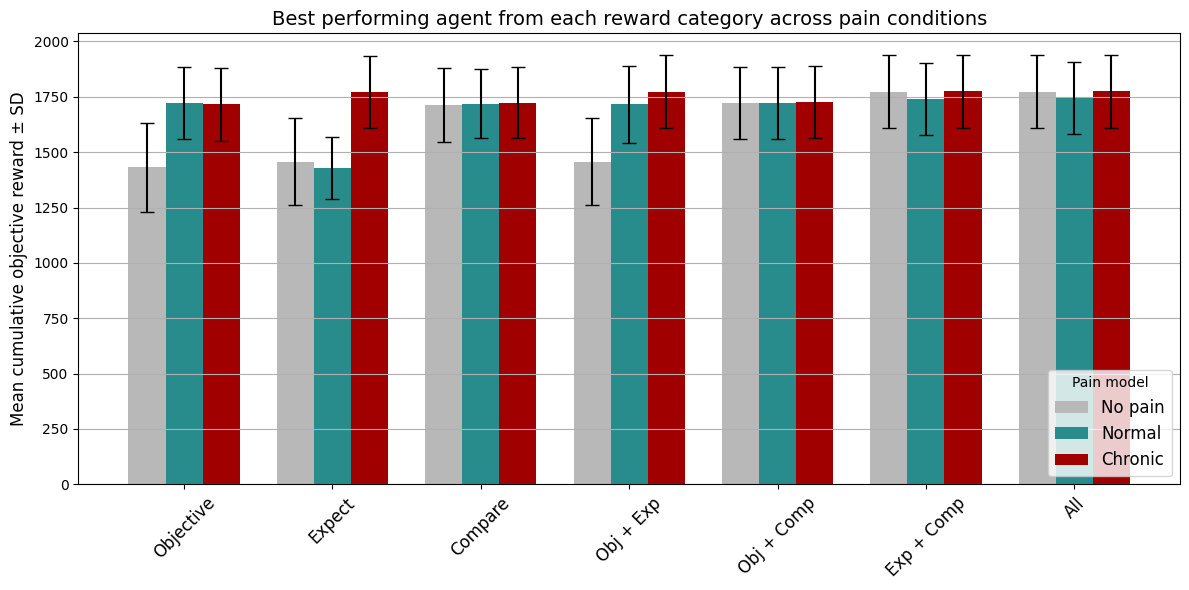

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Prepare grouped data: {category: {pain_model: (mean, std, alpha, w4)}}
grouped_results = {}

for series in list_of_best_pandas_series:
    w1, w2, w3 = series["w1"], series["w2"], series["w3"]
    if w1 > 0 and w2 == 0 and w3 == 0:
        category = "Objective"
    elif w1 == 0 and w2 > 0 and w3 == 0:
        category = "Expect"
    elif w1 == 0 and w2 == 0 and w3 > 0:
        category = "Compare"
    elif w1 > 0 and w2 > 0 and w3 == 0:
        category = "Obj + Exp"
    elif w1 > 0 and w2 == 0 and w3 > 0:
        category = "Obj + Comp"
    elif w1 == 0 and w2 > 0 and w3 > 0:
        category = "Exp + Comp"
    elif w1 > 0 and w2 > 0 and w3 > 0:
        category = "All"
    else:
        continue

    if series["w4"] == 0:
        pain_model = "No pain"
    else:
        pain_model = series["pain_model"].capitalize()  # Normal or Chronic

    grouped_results.setdefault(category, {})[pain_model] = (
        series["mean"], series["std"], series["alpha"], series["w4"]
    )

# Plot settings
ordered_categories = ["Objective", "Expect", "Compare", "Obj + Exp", "Obj + Comp", "Exp + Comp", "All"]
pain_models = ["No pain", "Normal", "Chronic"]
colors = [no_pain_color, normal_pain_color, chronic_pain_color]

x = np.arange(len(ordered_categories))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

max_height = 0  # for fixed y position of labels

for i, (pain_model, color) in enumerate(zip(pain_models, colors)):
    means, stds = [], []

    for cat in ordered_categories:
        value = grouped_results.get(cat, {}).get(pain_model, (np.nan, np.nan, None, None))
        means.append(value[0])
        stds.append(value[1])
        if not np.isnan(value[0]) and value[0] + value[1] > max_height:
            max_height = value[0] + value[1]

    bars = ax.bar(x + i * width, means, width, label=pain_model, color=color, yerr=stds, capsize=5)

    # Add alpha and w4 inside bars at fixed position
    fixed_y = max_height * 0.4  # slightly above lower third

# Axis & Legend
ax.set_xticks(x + width)
ax.set_xticklabels(ordered_categories, rotation=45, fontsize=axis_labels_font_size)
ax.set_ylabel("Mean cumulative objective reward ± SD", fontsize=axis_labels_font_size)
ax.set_title("Best performing agent from each reward category across pain conditions", fontsize=title_font_size)
ax.legend(title="Pain model", fontsize=label_font_size, loc="lower right")
ax.grid(True, axis='y')


plt.tight_layout()

output_dir = root_folder + experiment + "/" + plot_save_directory

os.makedirs(output_dir, exist_ok=True)

path = output_dir + "/performance_plot_" + experiment + ".png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

In [35]:
df_best = pd.DataFrame(list_of_best_pandas_series).drop(columns=["experiment_name"])
df_best.loc[df_best["w4"] == 0, "pain_model"] = "no"
df_best.to_csv("best_performing_agents.csv", index=False)
print(df_best)

        alpha   roh  epsilon pain_model   w1   w2   w3   w4         mean  \
248983    0.1  0.00     0.01         no  0.1  0.0  0.0  0.0  1431.373333   
91174     0.7  0.00     0.01     normal  0.3  0.0  0.0  0.7  1722.263333   
87446     0.7  0.00     0.01    chronic  0.7  0.0  0.0  0.1  1716.510000   
278402    0.3  0.00     0.01         no  0.0  1.0  0.0  0.0  1457.163333   
87296     0.7  0.00     0.01    chronic  0.0  0.5  0.0  0.1  1772.400000   
32510     0.9  0.00     0.01     normal  0.0  0.1  0.0  0.9  1430.356667   
310846    0.5  0.10     0.01         no  0.0  0.0  0.9  0.0  1714.923333   
199611    0.7  0.05     0.01    chronic  0.0  0.0  1.0  0.1  1724.006667   
145989    0.7  0.05     0.01     normal  0.0  0.0  0.9  0.1  1719.710000   
278549    0.3  0.00     0.01         no  0.5  1.0  0.0  0.0  1457.163333   
91007     0.7  0.00     0.01    chronic  0.9  0.5  0.0  0.3  1773.303333   
91374     0.7  0.00     0.01     normal  1.0  0.1  0.0  0.1  1715.973333   
262009    0.

In [36]:
def generate_latex_table_row(df_table):
    pain_dict = {"no": "No pain", "normal": "Normal pain", "chronic": "Chronic pain"}
    for index, row in df_table.iterrows():
        cur_pain_model = pain_dict[row["pain_model"]]
        print(
            f"& {cur_pain_model} & "
            f"${row['w1']}$ & "
            f"${row['w2']}$ & "
            f"${row['w3']}$ & "
            f"${row['w4']}$ & "
            f"{f'${row["roh"]}$' if row['w3'] != 0 else '\\textsc{{NA}}'} & "
            f"${row['epsilon']}$ & "
            f"${row['alpha']}$ & "
            f"${round(row['mean'], 2)}$ & "
            f"${round(row['std'], 2)}$ \\\\"
        )


In [37]:
generate_latex_table_row(df_best)

& No pain & $0.1$ & $0.0$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.01$ & $0.1$ & $1431.37$ & $200.14$ \\
& Normal pain & $0.3$ & $0.0$ & $0.0$ & $0.7$ & \textsc{{NA}} & $0.01$ & $0.7$ & $1722.26$ & $161.04$ \\
& Chronic pain & $0.7$ & $0.0$ & $0.0$ & $0.1$ & \textsc{{NA}} & $0.01$ & $0.7$ & $1716.51$ & $164.76$ \\
& No pain & $0.0$ & $1.0$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.01$ & $0.3$ & $1457.16$ & $197.56$ \\
& Chronic pain & $0.0$ & $0.5$ & $0.0$ & $0.1$ & \textsc{{NA}} & $0.01$ & $0.7$ & $1772.4$ & $163.62$ \\
& Normal pain & $0.0$ & $0.1$ & $0.0$ & $0.9$ & \textsc{{NA}} & $0.01$ & $0.9$ & $1430.36$ & $139.94$ \\
& No pain & $0.0$ & $0.0$ & $0.9$ & $0.0$ & $0.1$ & $0.01$ & $0.5$ & $1714.92$ & $167.28$ \\
& Chronic pain & $0.0$ & $0.0$ & $1.0$ & $0.1$ & $0.05$ & $0.01$ & $0.7$ & $1724.01$ & $159.38$ \\
& Normal pain & $0.0$ & $0.0$ & $0.9$ & $0.1$ & $0.05$ & $0.01$ & $0.7$ & $1719.71$ & $157.69$ \\
& No pain & $0.5$ & $1.0$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.01$ & $0.3$ & $1457.16$ 

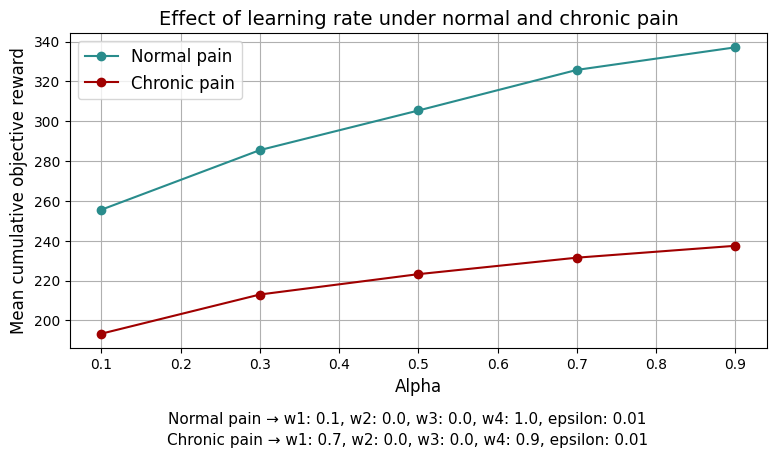

In [38]:
#fixed_for_alpha = df[(df["w1"] == 0.1) & (df["w2"] == 0.7) & (df["w3"] == 0) & (df["w4"] == 0.7) & (df["epsilon"] == 0.01)]

import matplotlib.pyplot as plt

# Filter data
normal_df = df[(df["pain_model"] == "normal") & (df["w1"] == 0.1) & (df["w2"] == 0) & (df["w3"] == 0) & (df["w4"] == 1) & (df["epsilon"] == 0.01)].sort_values("alpha")
chronic_df = df[(df["pain_model"] == "chronic") & (df["w1"] == 0.7) & (df["w2"] == 0) & (df["w3"] == 0) & (df["w4"] == 0.9) & (df["epsilon"] == 0.01)].sort_values("alpha")

# Plot
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(normal_df["alpha"], normal_df["mean"], marker='o', label="Normal pain", color=normal_pain_color)
ax.plot(chronic_df["alpha"], chronic_df["mean"], marker='o', label="Chronic pain", color=chronic_pain_color)

ax.set_xlabel("Alpha", fontsize=axis_labels_font_size)
ax.set_ylabel("Mean cumulative objective reward", fontsize=axis_labels_font_size)
ax.set_title("Effect of learning rate under normal and chronic pain", fontsize=title_font_size)
ax.grid(True)
ax.legend(fontsize=label_font_size)

# Extract metadata
n_row = normal_df.iloc[0]
c_row = chronic_df.iloc[0]

# Normal Pain info
n_info = (
    f"Normal pain → w1: {n_row['w1']}, w2: {n_row['w2']}, w3: {n_row['w3']}, w4: {n_row['w4']}, "
    f"epsilon: {n_row['epsilon']}"
)

# Chronic Pain info
c_info = (
    f"Chronic pain → w1: {c_row['w1']}, w2: {c_row['w2']}, w3: {c_row['w3']}, w4: {c_row['w4']}, "
    f"epsilon: {c_row['epsilon']}"
)

# Full caption text (multi-line)
full_caption = f"{n_info}\n{c_info}"

# Adjust layout to fit multi-line caption
fig.subplots_adjust(bottom=0.25)
fig.text(0.5, 0.05, full_caption, ha='center', va='bottom', fontsize=caption_font_size, linespacing=1.5)

plt.savefig(root_folder + experiment + "/" + plot_save_directory + "/" + "alpha_vs_reward_stationary_obj.png", dpi=300, bbox_inches='tight')
plt.show()

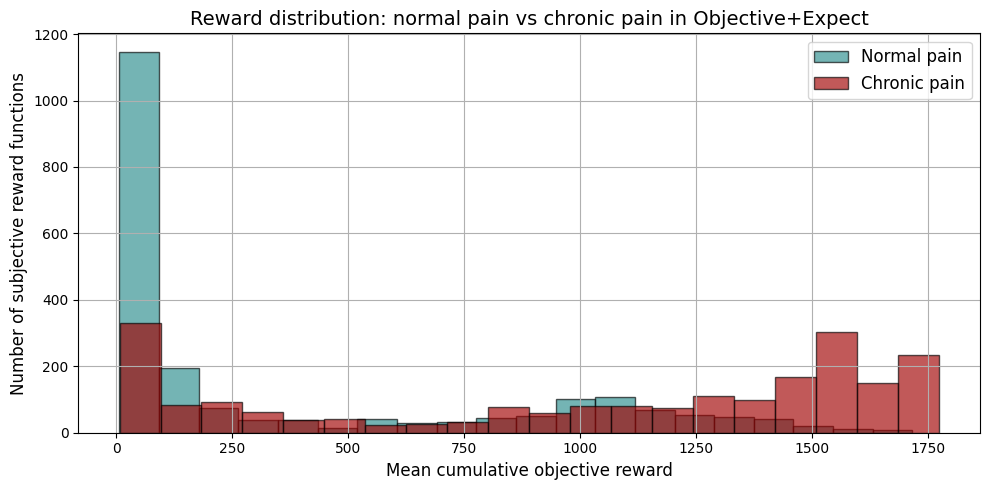

Mean reward (Normal Pain, Obj + Exp): 370.13
Mean reward (Chronic Pain, Obj + Exp): 1008.60


In [39]:
# Filter: Normal pain agents with Objective + Expect + Pain (no Compare)
normal_objexp_pain = df[
    (df["pain_model"] == "normal") &
    (df["w1"] > 0) & (df["w2"] > 0) &
    (df["w3"] == 0) & (df["w4"] > 0)
]

# Filter: All chronic pain agents
chronic_all = df[
    (df["pain_model"] == "chronic") &
    (df["w1"] > 0) & (df["w2"] > 0) &
    (df["w3"] == 0) & (df["w4"] > 0)
]

# Extract cumulative objective rewards
normal_rewards = normal_objexp_pain["mean"]
chronic_rewards = chronic_all["mean"]

# Plot histogram
plt.figure(figsize=(10, 5))
bins = 20

plt.hist(normal_rewards, bins=bins, alpha=0.65, label="Normal pain", color=normal_pain_color, edgecolor='black')
plt.hist(chronic_rewards, bins=bins, alpha=0.65, label="Chronic pain", color=chronic_pain_color, edgecolor='black')

# Labels & Title
plt.xlabel("Mean cumulative objective reward", fontsize=axis_labels_font_size)
plt.ylabel("Number of subjective reward functions", fontsize=axis_labels_font_size)
plt.title("Reward distribution: normal pain vs chronic pain in Objective+Expect", fontsize=title_font_size)
plt.legend(fontsize=label_font_size)
plt.grid(True)

plt.tight_layout()
plt.savefig(root_folder + experiment + "/" + plot_save_directory + "/" + "reward_distribution_obj_exp_pain.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate mean of the means
normal_mean = normal_rewards.mean()
chronic_mean = chronic_rewards.mean()

print(f"Mean reward (Normal Pain, Obj + Exp): {normal_mean:.2f}")
print(f"Mean reward (Chronic Pain, Obj + Exp): {chronic_mean:.2f}")


In [40]:
#visualizer = get_experiment_visualizer(best_obj_with_w4_other)
#visualizer.plot_subjective_pain("chronic_obj2")

In [41]:
visualizer = get_experiment_visualizer(best_exp_with_w4)
visualizer.save_selected_metrics_plot(["Cum. obj. reward","Objective reward", "Well-being", "Subjective pain"], "metrics_cp_lifetime.png", "Expect, Chronic Pain")
visualizer = get_experiment_visualizer(best_exp_with_w4_other)
visualizer.save_selected_metrics_plot(["Cum. obj. reward","Objective reward", "Well-being", "Subjective pain"], "metrics_np_lifetime.png", "Expect, Normal Pain")

In [42]:
df_exp_higher_pain = df[(df["w1"] == 0) &( df["w2"] == 0.1) & (df["w3"] == 0) & (df["w4"] == 1) & (df["pain_model"] == "normal")]
print(df_exp_higher_pain)

        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
32511     0.9  0.0     0.01     normal  0.0  0.1  0.0  1.0   
91085     0.7  0.0     0.01     normal  0.0  0.1  0.0  1.0   
71722     0.7  0.0     0.10     normal  0.0  0.1  0.0  1.0   
44648     0.9  0.0     0.10     normal  0.0  0.1  0.0  1.0   
294299    0.5  0.0     0.01     normal  0.0  0.1  0.0  1.0   
309436    0.5  0.0     0.10     normal  0.0  0.1  0.0  1.0   
278373    0.3  0.0     0.01     normal  0.0  0.1  0.0  1.0   
297010    0.3  0.0     0.10     normal  0.0  0.1  0.0  1.0   
248947    0.1  0.0     0.01     normal  0.0  0.1  0.0  1.0   
236829    0.1  0.0     0.10     normal  0.0  0.1  0.0  1.0   

                                        experiment_name         mean  \
32511   experiment_7dfe592e-cce1-4b49-95e0-894f071bdbe2  1402.816667   
91085   experiment_c19fd385-385f-4758-baa1-05dd3cac7ae4  1337.193333   
71722   experiment_4ab290ae-c762-46a9-ac02-d5038c39e084  1219.296667   
44648   experiment_c95cc70a-3

In [43]:
d = {"alpha": 0.7, "roh": 0.0, "epsilon": 0.01, "pain_model": "normal", "w1": 0.0, "w2": 0.5, "w3": 0.0, "w4": 1.4}
ser = pd.Series(data=d, index=["alpha", "roh", "epsilon", "pain_model", "w1", "w2", "w3", "w4"])
print(ser)
visualizer = get_experiment_visualizer(ser)
visualizer.save_selected_metrics_plot(["Cum. well-being", "Well-being", "Subjective pain"], "2_normal_pain_expect.png", "Expect, Normal Pain")

alpha            0.7
roh              0.0
epsilon         0.01
pain_model    normal
w1               0.0
w2               0.5
w3               0.0
w4               1.4
dtype: object


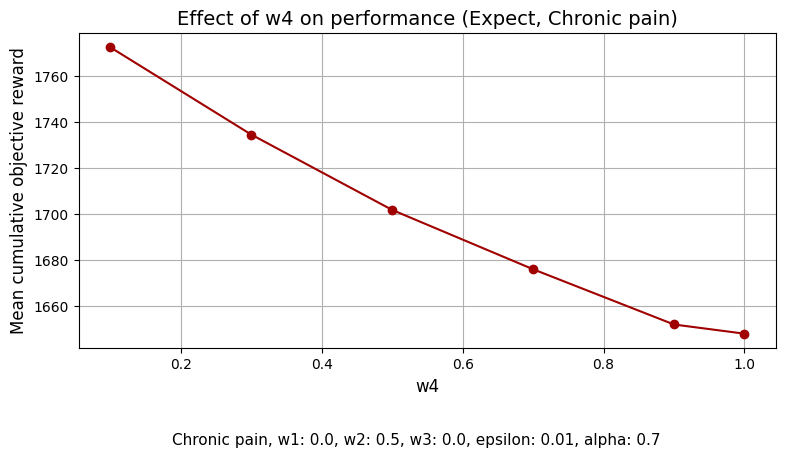

In [44]:
import matplotlib.pyplot as plt

# Filter for one specific agent
agent_df = df[
    (df["pain_model"] == "chronic") &
    (df["w1"] == 0.0) &
    (df["w2"] == 0.5) &
    (df["w3"] == 0.0) &
    (df["w4"] != 0.0) &
    (df["epsilon"] == 0.01) &
    (df["roh"] == 0.00) &
    (df["alpha"] == 0.7)
].sort_values("w4")  # Sort by w4

# Plot
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(agent_df["w4"], agent_df["mean"], marker='o', color=chronic_pain_color)

ax.set_xlabel("w4", fontsize=axis_labels_font_size)
ax.set_ylabel("Mean cumulative objective reward", fontsize=axis_labels_font_size)
ax.set_title("Effect of w4 on performance (Expect, Chronic pain)", fontsize=title_font_size)
ax.grid(True)

# Extract metadata from first row
row = agent_df.iloc[0]
info = (
    ("Normal pain" if row['pain_model'] == "normal" else "Chronic pain") + ", "
    f"w1: {row['w1']}, w2: {row['w2']}, w3: {row['w3']}, "
    f"epsilon: {row['epsilon']}, "
    f"alpha: {row['alpha']}"
)


# Add caption below the plot
fig.subplots_adjust(bottom=0.25)
fig.text(0.5, 0.05, info, ha='center', va='bottom', fontsize=caption_font_size, linespacing=1.5)

# Save plot
plt.savefig(
    root_folder + experiment + "/" + plot_save_directory + "/w4_vs_reward_chronic.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()
